
#DONE BY EEVANI BHARGAVI

# Task - 4 Exploratory Data Analysis - Terrorism

# Highlighted points for this task :-


> ● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

> ● As a security/defense analyst, try to find out the hot zone of terrorism.

> ● What all security issues and insights you can derive by EDA?

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Let's import to our data and check the basics.

gt = pd.read_csv('/content/global.csv',encoding='ISO-8859-1')
gt.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
gt.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
gt.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
# Here I just take important data in whole dataset those I'm using further processing.

gt = gt[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
# Checking the null velues in data

gt.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            26
Region            0
city              0
latitude        183
longitude       183
AttackType        0
Killed          809
Wounded        2043
Target           66
Summary        6461
Group             1
Target_type       0
Weapon_type       1
Motive         6725
dtype: int64

In [7]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7316 non-null   int64  
 1   Month        7316 non-null   int64  
 2   Day          7316 non-null   int64  
 3   Country      7316 non-null   object 
 4   state        7290 non-null   object 
 5   Region       7316 non-null   object 
 6   city         7316 non-null   object 
 7   latitude     7133 non-null   float64
 8   longitude    7133 non-null   float64
 9   AttackType   7316 non-null   object 
 10  Killed       6507 non-null   float64
 11  Wounded      5273 non-null   float64
 12  Target       7250 non-null   object 
 13  Summary      855 non-null    object 
 14  Group        7315 non-null   object 
 15  Target_type  7316 non-null   object 
 16  Weapon_type  7315 non-null   object 
 17  Motive       591 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

In [8]:
print("Country with the most attacks:",gt['Country'].value_counts().idxmax())
print("City with the most attacks:",gt['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",gt['Region'].value_counts().idxmax())
print("Year with the most attacks:",gt['Year'].value_counts().idxmax())
print("Month with the most attacks:",gt['Month'].value_counts().idxmax())
print("Group with the most attacks:",gt['Group'].value_counts().index[1])
print("Most Attack Types:",gt['AttackType'].value_counts().idxmax())

Country with the most attacks: United Kingdom
City with the most attacks: New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1978
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


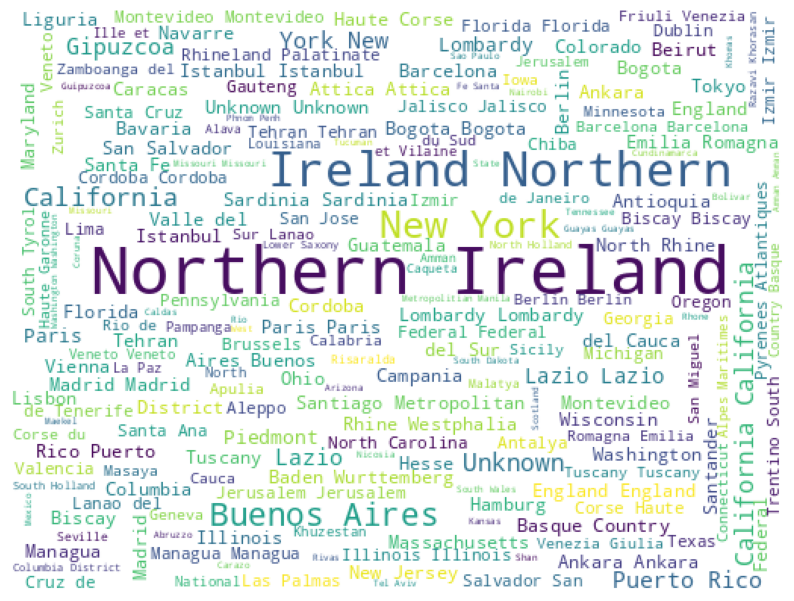

In [9]:
from wordcloud import WordCloud
from scipy import signal
cities = gt.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [10]:
gt['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979      64
Name: Year, dtype: int64

# DATA VISUALISATION


# Number of Terrorist Activities each Year

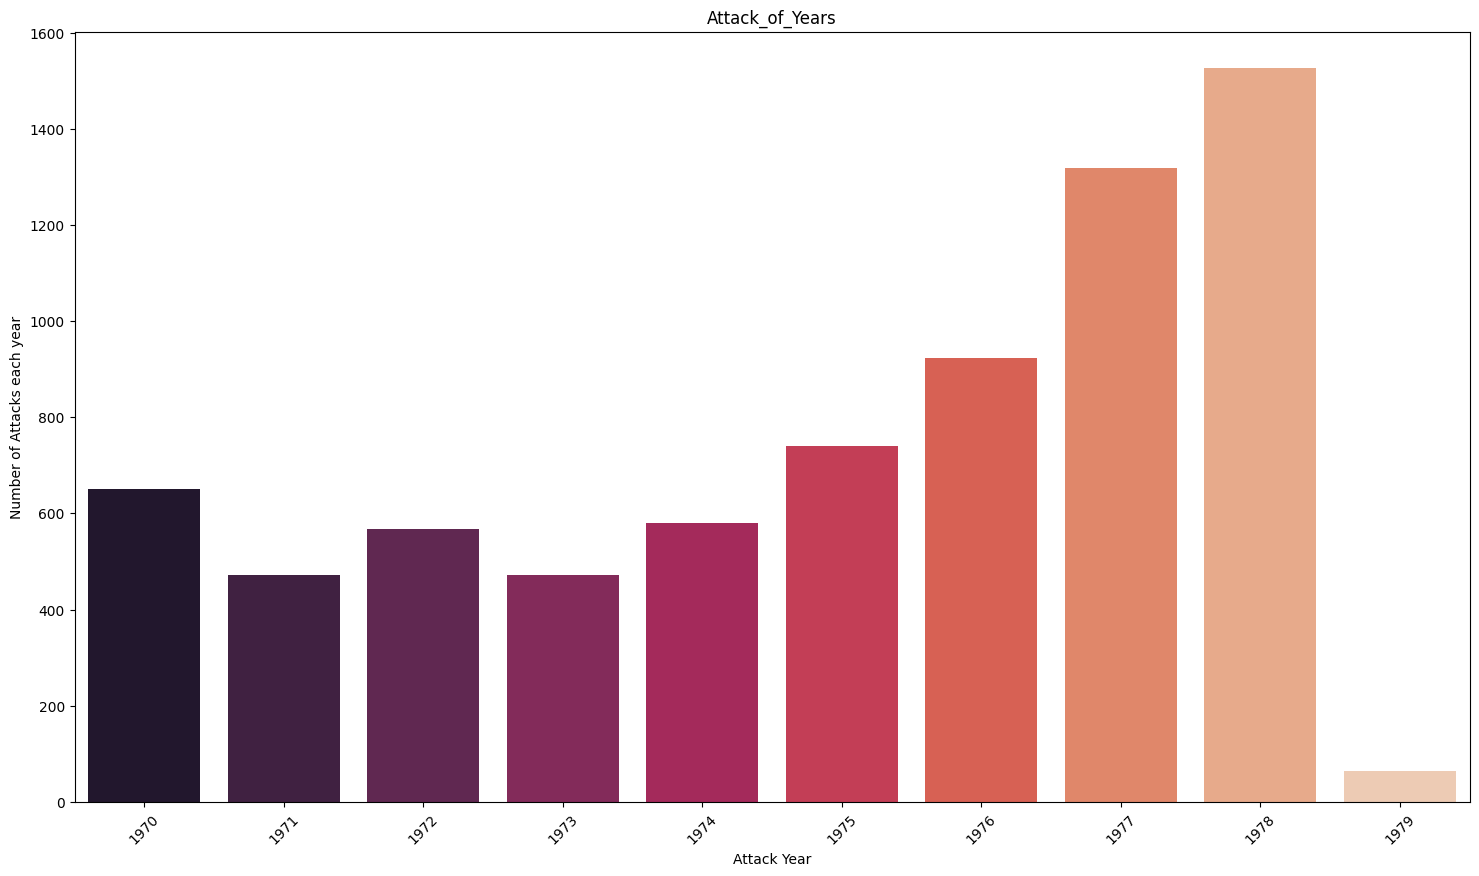

In [11]:
x_year = gt['Year'].unique()
y_count_years = gt['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

# Terrorist Activities by Region in each Year through Area Plot

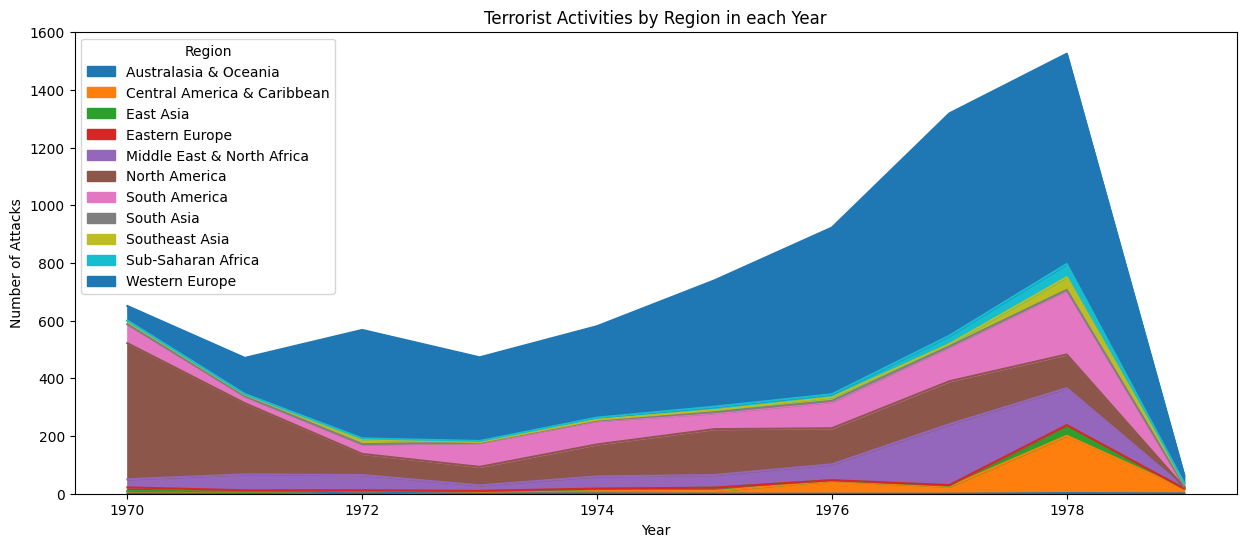

In [14]:
pd.crosstab(gt.Year, gt.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [15]:
gt['Wounded'] = gt['Wounded'].fillna(0).astype(int)
gt['Killed'] = gt['Killed'].fillna(0).astype(int)
gt['casualities'] = gt['Killed'] + gt['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [16]:
gt1 = gt.sort_values(by='casualities',ascending=False)[:40]

In [17]:
heat=gt1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [18]:
heat.head()

Year,1970,1972,1973,1974,1975,1976,1977,1978
Country,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,92.0,52.5,0.0,0.0
Barbados,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0
Greece,0.0,0.0,60.0,88.0,0.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0
Iraq,0.0,0.0,0.0,0.0,0.0,295.0,0.0,0.0


In [21]:
gt.Country.value_counts()[:15]

United Kingdom        1407
United States         1406
Italy                  824
Spain                  632
Turkey                 343
Argentina              314
Colombia               282
France                 265
West Germany (FRG)     256
Greece                 134
El Salvador            119
Mexico                 104
Nicaragua              100
Iran                    95
Philippines             76
Name: Country, dtype: int64

# ANALYSIS ON CUSTOMIZED DATA

# Terrorist Attacks of a Particular year and their Locations


Let's look at the terrorist acts in the world over a certain year.

In [25]:
import folium
from folium.plugins import MarkerCluster
filterYear = gt['Year'] == 1980

In [26]:
filterData = gt[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [27]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

About 20% of the incidents occurred in Latin America and another 20% in the Middle East. , Of the 5,955 international terrorist incidents recorded between 1968 and 1979, 673 incidents (II percent) involved deaths and 867 (15 percent) involved injuries. These proportions are up sliahtly in 1980.

Now let's check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [28]:
gt.Group.value_counts()[1:15]

Irish Republican Army (IRA)                             820
Basque Fatherland and Freedom (ETA)                     263
Protestant extremists                                   188
Left-Wing Militants                                     169
Ulster Volunteer Force (UVF)                            164
Red Brigades                                            124
Black September                                         120
Montoneros (Argentina)                                  109
Fuerzas Armadas de Liberacion Nacional (FALN)            96
Ulster Freedom Fighters (UFF)                            91
New World Liberation Front (NWLF)                        86
Sandinista National Liberation Front (FSLN)              84
Black Nationalists                                       83
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)     82
Name: Group, dtype: int64

In [29]:
test = gt[gt.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [30]:
test.Country.unique()

array(['Peru'], dtype=object)

In [31]:
gt_df_group = gt.dropna(subset=['latitude','longitude'])
gt_df_group = gt_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = gt.Group.value_counts()[1:8].index.tolist()
gt_df_group = gt_df_group.loc[gt_df_group.Group.isin(terrorist_groups)]
print(gt_df_group.Group.unique())

['Left-Wing Militants' 'Irish Republican Army (IRA)'
 'Ulster Volunteer Force (UVF)' 'Protestant extremists'
 'Basque Fatherland and Freedom (ETA)' 'Black September' 'Red Brigades']


In [32]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(gt_df_group)):
    folium.Marker([gt_df_group.iloc[i]['latitude'],gt_df_group.iloc[i]['longitude']],
                  popup='Group:{}<br>Country:{}'.format(gt_df_group.iloc[i]['Group'],
                  gt_df_group.iloc[i]['Country'])).add_to(map)
map

The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive.

In [35]:
gt.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [36]:
# Total Number of people killed in terror attack

killData = gt.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 5114


In [37]:
# Let's look at what types of attacks these deaths were made of.

attackData = gt.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [38]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

In [40]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

In [42]:
#Number of Killed in Terrorist Attacks by Countries

countryData = gt.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [43]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
Killed,0,0,0,0,317,3,9,0,0,73,...,1638,164,4,2,9,44,0,2,1,5


In [44]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

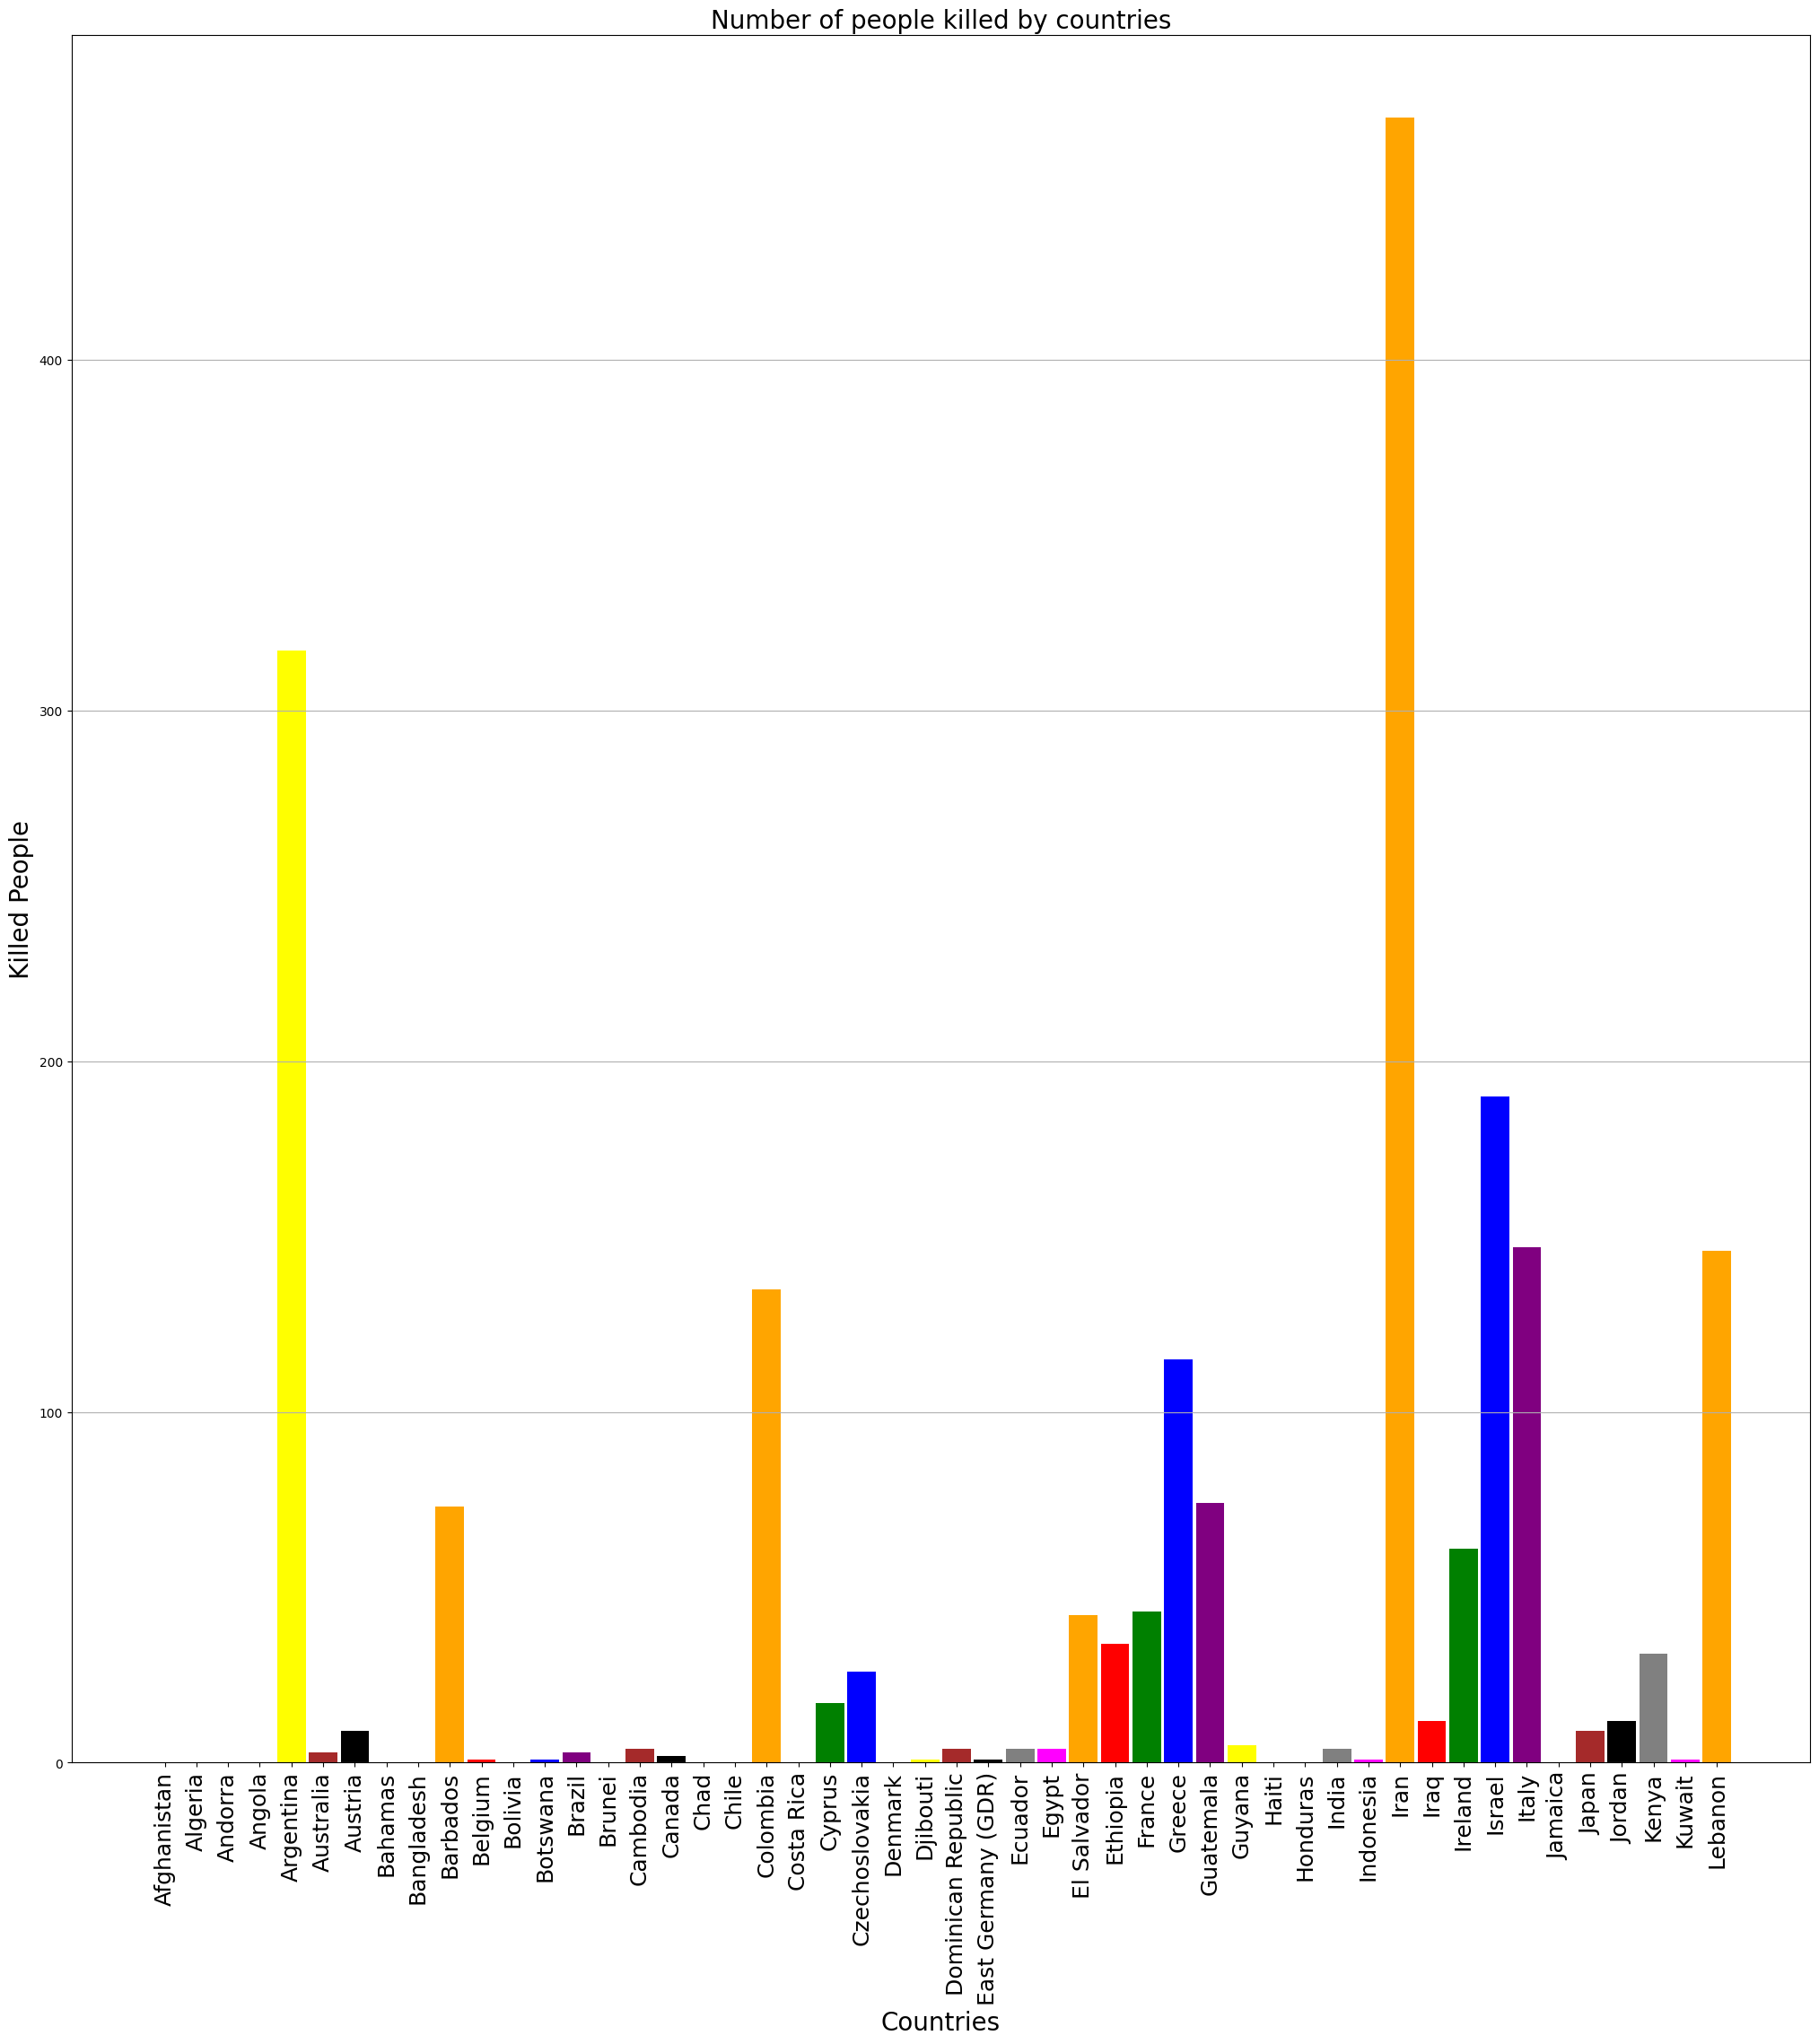

In [45]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

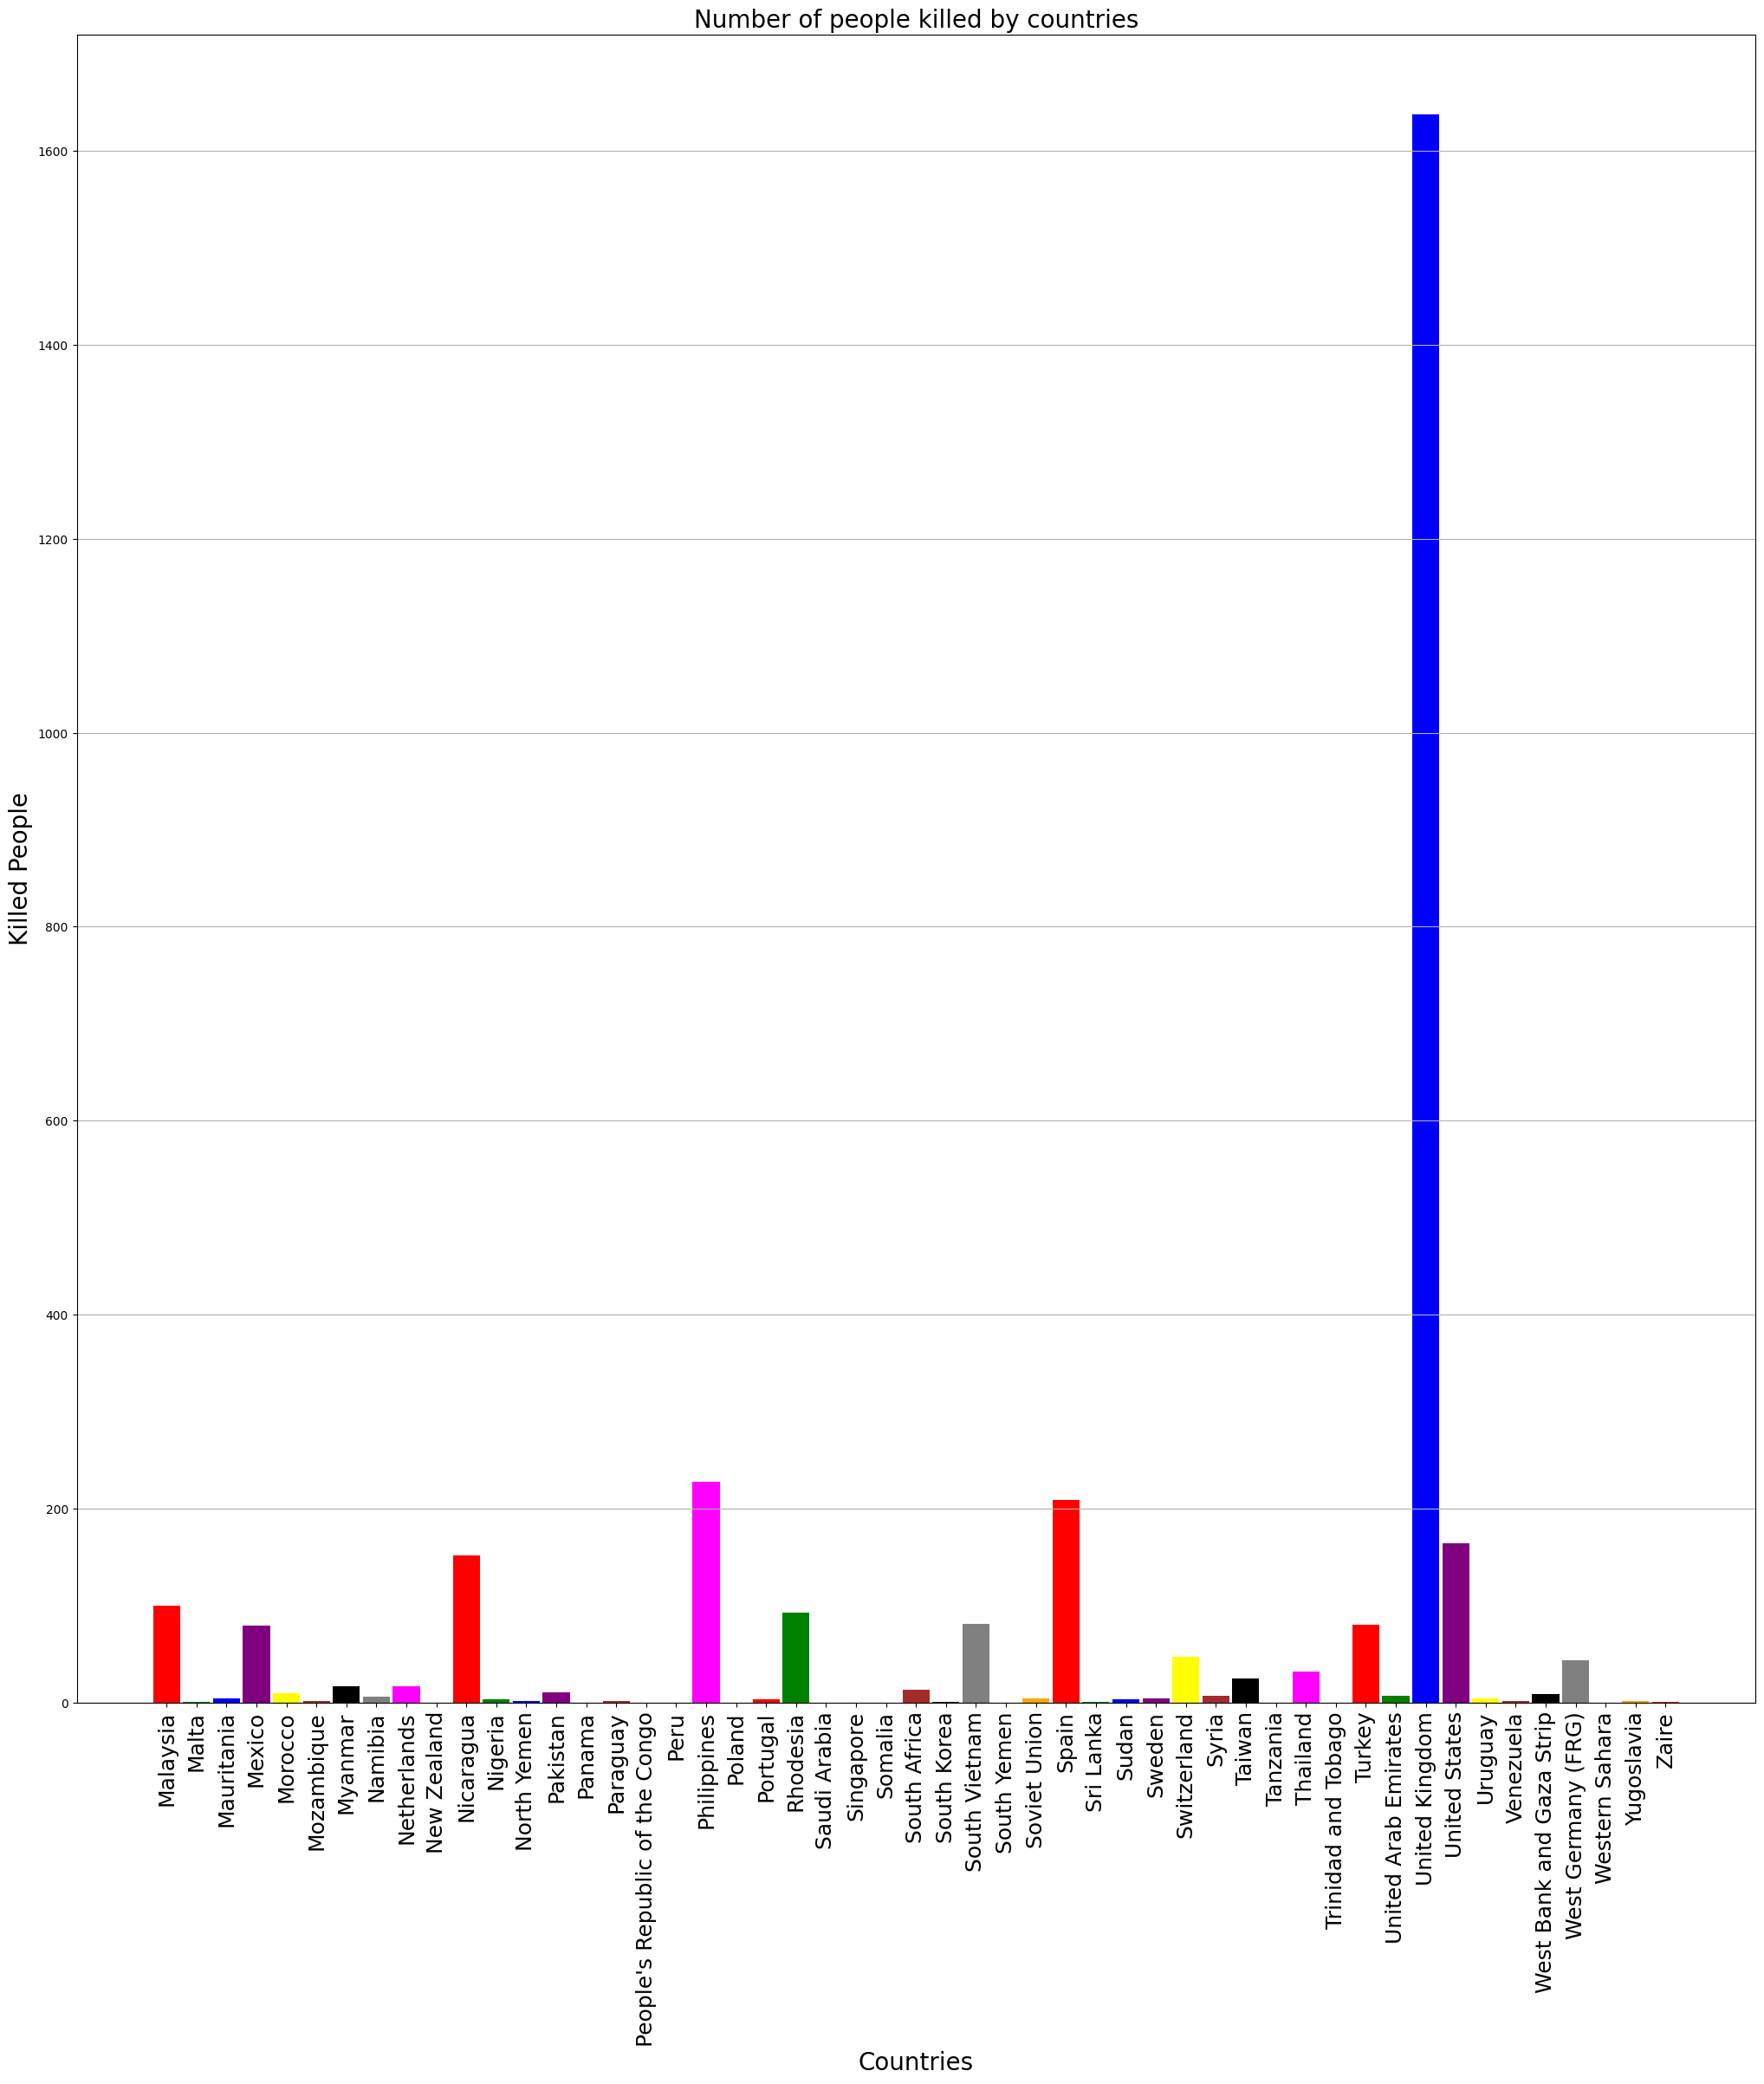

In [46]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

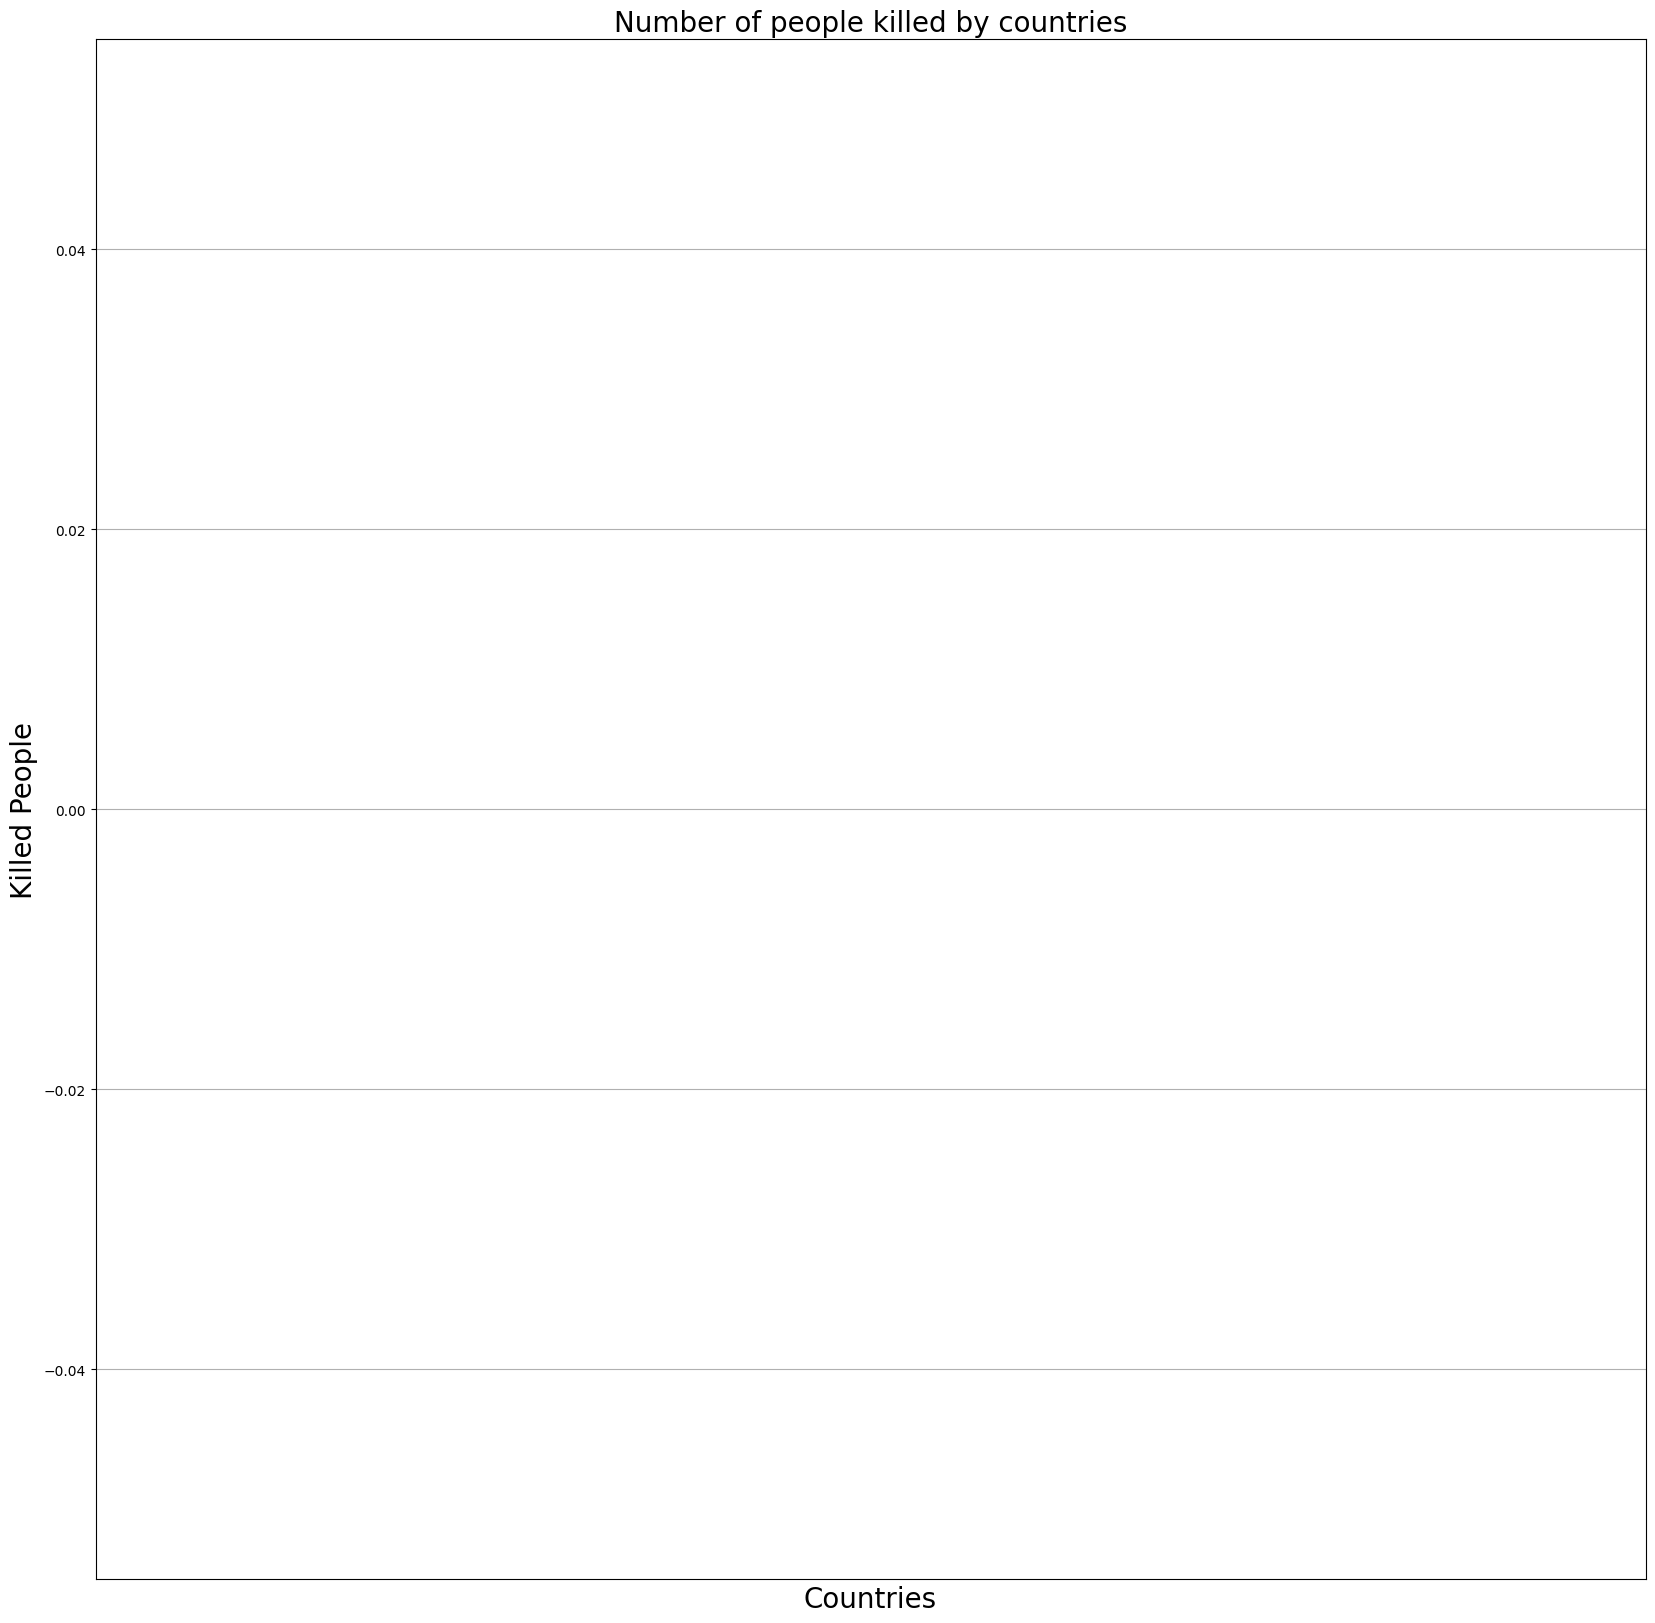

In [47]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.